1.Importing libraries

In [96]:
import numpy as np
import pandas as pd

2.Collecting the data and loading the data

In [97]:
# loading the data to a Pandas DataFrame
# stored in the insurance_df
insurance_df = pd.read_csv("/content/insurance.csv")

In [98]:
# first 5 rows of the dataframe
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
# last 5 rows of the dataframe
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [100]:
# printing number of rows and columns in the dataset
insurance_df.shape

(1338, 7)

In [101]:
# getting information about the data
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


2.Cleaning th data


In [102]:
# checking for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [103]:
insurance_df.shape

(1338, 7)

3.Data Analysis

In [104]:
# statistical Measures of the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

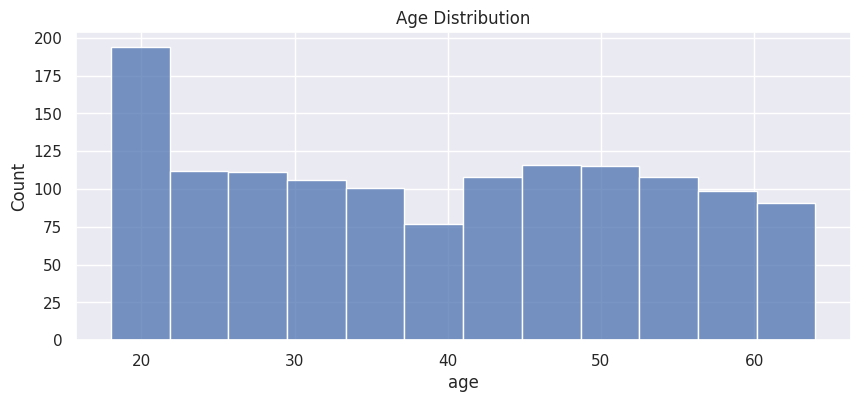

In [106]:
# distribution of age value
sns.set()
plt.figure(figsize=(10,4))
sns.histplot(insurance_df['age'])
plt.title('Age Distribution')
plt.show()

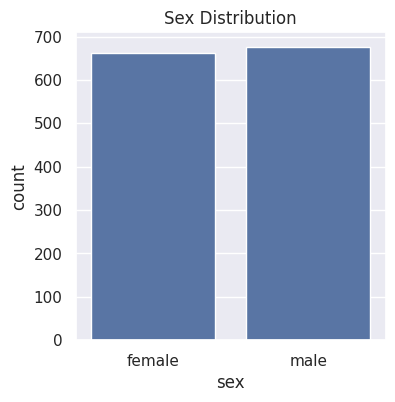

In [107]:
# Gender column
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=insurance_df)
plt.title('Sex Distribution')
plt.show()

In [108]:
insurance_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

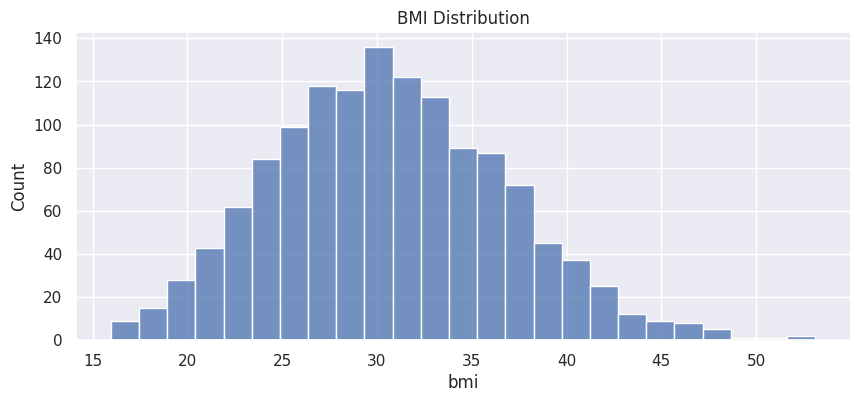

In [109]:
# bmi distribution
plt.figure(figsize=(10,4))
sns.histplot(insurance_df['bmi'])
plt.title('BMI Distribution')
plt.show()

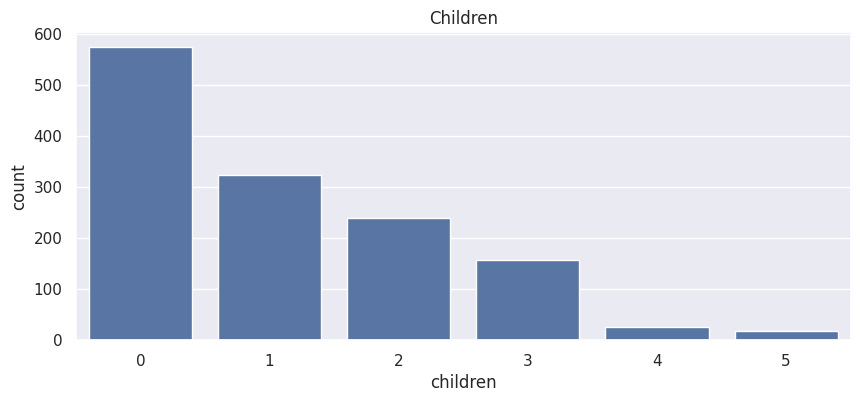

In [110]:
# children column
plt.figure(figsize=(10,4))
sns.countplot(x='children', data=insurance_df)
plt.title('Children')
plt.show()

In [111]:
insurance_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

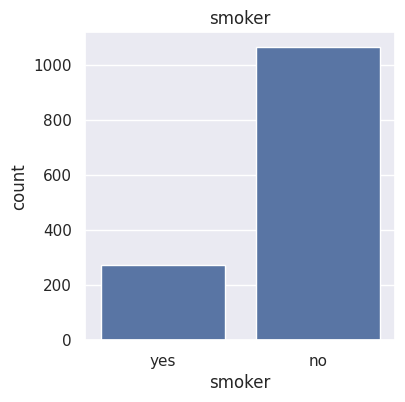

In [112]:
# smoker column
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data=insurance_df)
plt.title('smoker')
plt.show()

In [113]:
insurance_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

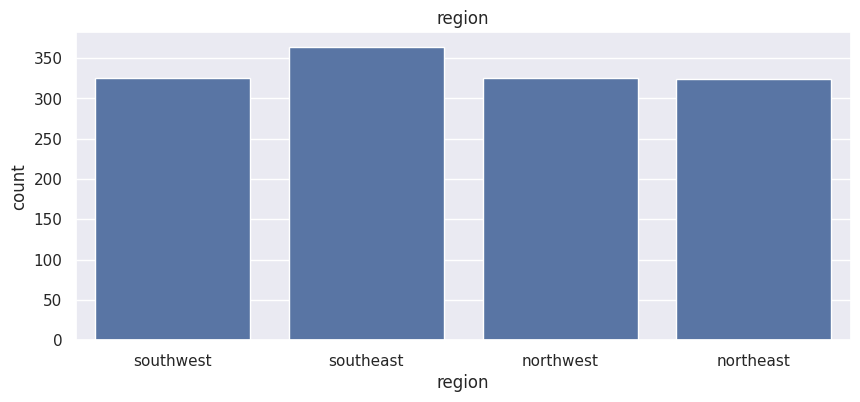

In [114]:
# region column
plt.figure(figsize=(10,4))
sns.countplot(x='region', data=insurance_df)
plt.title('region')
plt.show()

In [115]:
insurance_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

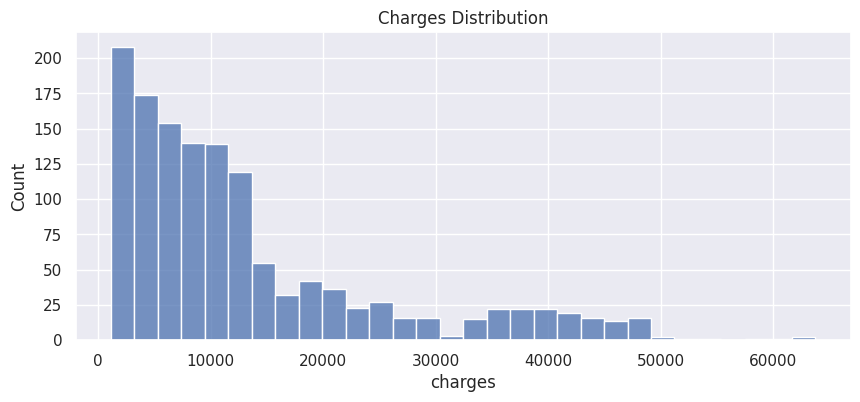

In [116]:
# distribution of charges value
plt.figure(figsize=(10,4))
sns.histplot(insurance_df['charges'])
plt.title('Charges Distribution')
plt.show()

4.Data Pre-Processing

There are three Categorical Features in this data
Sex,
Smoker,
Region.

In [117]:
#Encoding the categorical features:

# encoding sex column
insurance_df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

5.Splitting the Independent and Dependent variables

In [118]:
#Independent variables
X= insurance_df.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [119]:
#Dependent variables
#charges
Y= insurance_df.iloc[:,-1]
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

6.Splitting the data into Training data & Testing Data

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [121]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


7.Model Training using Linear Regression

In [122]:
# loading the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [123]:
regressor.fit(X_train, Y_train)

LinearRegression()

8.Model Evaluation

In [124]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [125]:
# R squared value
from sklearn import metrics
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [126]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [127]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


9.Building a Predictive System

In [131]:
input_data = (25,0,23.40,2,1,0)

# Create a DataFrame with correct column names
input_df = pd.DataFrame([input_data], columns=X.columns)

# Make the prediction
prediction = regressor.predict(input_df)
print(prediction)

print('The insurance cost is', prediction[0])

[2612.36894153]
The insurance cost is 2612.3689415325953
